In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('../datasets/train_triplets.txt', header=None, sep='\t', names=['user','song','count'])

In [10]:
df.head()

,user,song,count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [11]:
nusers = df.user.nunique()
nsongs = df.song.nunique()

In [12]:
print(f'{nusers} users, {nsongs} songs')

1019318 users, 384546 songs


In [14]:
# Convert user id and song id to numerical ids
df['user_id'] = df['user'].astype('category').cat.codes
df['song_id'] = df['song'].astype('category').cat.codes

df_orig = df.copy()

# Drop 'user' and 'song'
df = df.drop(['user','song'], axis=1)

# Sort values
df = df.sort_values(by=['user_id','song_id'])

In [16]:
records_per_user = (
        df.groupby('user_id')['song_id'].count()
    ).reset_index().rename({'song_id':'records_per_user'}, axis=1)

In [25]:
records_per_song = (
        df.groupby('song_id')['user_id'].count()
    ).reset_index().rename({'user_id': 'records_per_song'}, axis=1)

In [47]:
records_per_user.groupby('records_per_user')['user_id'].count().iloc[:15]

records_per_user
10    50608
11    46219
12    42170
13    38721
14    35585
15    33065
16    30834
17    28662
18    26931
19    25420
20    23627
21    22268
22    20679
23    19546
24    18646
Name: user_id, dtype: int64

In [48]:
records_per_song.groupby('records_per_song')['song_id'].count().iloc[:15]

records_per_song
1     31781
2     26516
3     22192
4     18996
5     16354
6     14477
7     12287
8     11048
9      9679
10     8689
11     7860
12     7308
13     6565
14     5916
15     5474
Name: song_id, dtype: int64

In [91]:
# users that have 15 or more records in dataset
qusers_15 = np.sort(records_per_user[records_per_user['records_per_user'] >= 15]['user_id'].values)
len(qusers_15)

806015

In [96]:
# songs that have 10 or more records in dataset
qsongs_10 = np.sort(records_per_song[records_per_song['records_per_song'] >= 10]['song_id'].values)
len(qsongs_10)

221216

In [103]:
df_15_10 = pd.DataFrame(columns=['count','user_id','song_id'])

for user in qusers_15:
    usongs = df[df['user_id'] == user]['song_id'].values
    

In [93]:
qusers_15_10 = [user for user in qusers_15 if df[df['user_id'] == user].values.__contains__(song in qsongs_10)]

NameError: name 'song' is not defined

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

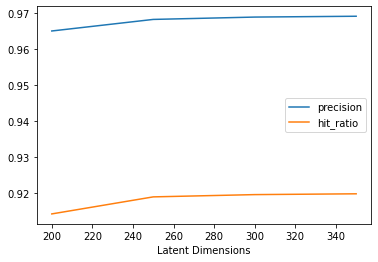

In [80]:
latent_dims = [200, 250, 300, 350]
precision = [0.965031, 0.968241, 0.968892, 0.969123]
log_precision = [np.log(x) for x in precision]
recall = [0.168893, 0.169767, 0.169883, 0.169924]
log_recall = [np.log(x) for x in recall]
hit_ratio = [0.914239, 0.91897, 0.9196, 0.919823]
log_hit_ratio = [np.log(x) for x in hit_ratio]

plt.plot(latent_dims, precision, label='precision')
plt.plot(latent_dims, hit_ratio, label='hit_ratio')
plt.xlabel('Latent Dimensions')
plt.legend()
plt.show()

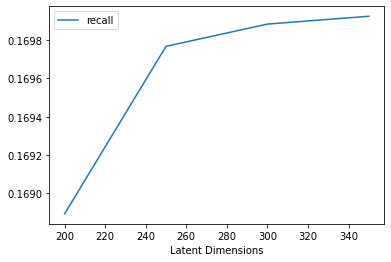

In [82]:
plt.plot(latent_dims, recall, label='recall')
plt.xlabel('Latent Dimensions')
plt.legend()
plt.show()